In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 회귀분석
from statsmodels.formula.api import ols
# qqplot, 회귀분석의 상수항 추가
from statsmodels.api import qqplot, add_constant
# 선형 모델 formula(y ~ X1 + X2 + ...)
import statsmodels.formula.api as smf
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 선형회귀모형
from sklearn.linear_model import LinearRegression
# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE
# Scale 변환->표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler
# 평가함수
from statsmodels.tools.eval_measures import rmse
import matplotlib
# 패키지 불러오기
from sklearn.linear_model import Ridge, Lasso, ElasticNet
#from sklearn.tree import export_graphviz  환경 설정하기 어려움
#import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
# 나무 구조 시각화  
from sklearn.tree import plot_tree
# 예측 / 회귀 random forest
from sklearn.ensemble import RandomForestRegressor
matplotlib.rc('font', family = 'Malgun Gothic') 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import scale, minmax_scale, robust_scale
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

#평가 함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# 음수 표시
matplotlib.rc('axes', unicode_minus=False)
matplotlib.rc('font', family = 'Malgun Gothic') 

from scipy.stats import chi2_contingency
from scipy import stats

# 로지스틱 회귀
from statsmodels.api import Logit
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [7]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc

In [53]:
df = pd.read_csv("C:/Users/USER/Desktop/반도체 공정/데이터/데이터셋 초초안.CSV",encoding='euc-kr')
df

,Unnamed: 0,type,Temp_OXid,ppm,Pressure,Oxid_time,thickness,resist_target,N2_HMDS,pressure_HMDS,...,Flux160s,Flux480s,Flux840s,input_Energy,Temp_implantation,Furance_Temp,RTA_Temp,Target,Chamber,Etching_rate
0,0,dry,1214.307948,26.69,0.203,120,713.132,1.46994,17.367,15.006,...,1.380000e+17,3.010000e+17,6.000000e+17,30795.934,103.433,854.0,154,0,21111,169.78300
1,1,dry,978.110792,30.86,0.217,137,714.295,0.86579,16.090,15.059,...,1.380000e+17,3.030000e+17,6.000000e+17,32135.618,105.552,895.0,156,0,21122,171.94875
2,2,dry,1176.019149,31.07,0.218,116,710.114,0.90483,19.026,14.930,...,1.380000e+17,2.980000e+17,6.000000e+17,31057.895,102.598,898.0,152,0,21133,167.25350
3,3,dry,933.442733,31.04,0.196,143,710.617,0.42197,18.891,14.947,...,1.380000e+17,3.000000e+17,6.000000e+17,32140.566,102.963,879.0,155,0,21111,169.45425
4,4,wet,1140.598752,31.37,0.215,76,711.632,1.70139,13.788,14.820,...,1.380000e+17,3.020000e+17,6.000000e+17,31986.009,101.419,882.0,155,0,21122,172.43300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,1699,wet,1275.182502,45.10,0.214,21,715.498,0.89644,16.029,15.005,...,1.380000e+17,3.010000e+17,6.000000e+17,32248.621,101.503,868.0,152,0,33333,174.44950
1700,1700,wet,1268.105427,45.07,0.215,22,707.179,1.02384,17.587,14.949,...,1.870000e+17,3.010000e+17,6.000000e+17,32241.426,101.061,867.0,152,0,11133,172.29475
1701,1701,wet,1279.160563,45.12,0.214,21,712.946,1.02634,16.445,14.978,...,1.380000e+17,2.990000e+17,6.000000e+17,32245.574,101.506,868.0,152,0,11222,174.68650
1702,1702,wet,1272.804948,45.34,0.213,20,711.987,0.56833,15.306,15.050,...,1.380000e+17,2.990000e+17,6.000000e+17,32259.412,101.360,868.0,152,0,11311,174.82175


In [54]:
df = df[['Etching_rate','thickness','ppm','Resolution','Selectivity','RTA_Temp','Temp_OXid','Line_CD','input_Energy','Temp_Etching','Target']]

In [55]:
df

,Etching_rate,thickness,ppm,Resolution,Selectivity,RTA_Temp,Temp_OXid,Line_CD,input_Energy,Temp_Etching,Target
0,169.78300,713.132,26.69,505.388,1.030,154,1214.307948,41.676,30795.934,72.651,0
1,171.94875,714.295,30.86,541.732,1.038,156,978.110792,53.612,32135.618,70.267,0
2,167.25350,710.114,31.07,532.200,1.005,152,1176.019149,47.598,31057.895,71.231,0
3,169.45425,710.617,31.04,537.729,1.025,155,933.442733,32.843,32140.566,71.295,0
4,172.43300,711.632,31.37,522.143,1.038,155,1140.598752,57.370,31986.009,72.983,0
...,...,...,...,...,...,...,...,...,...,...,...
1699,174.44950,715.498,45.10,468.930,1.015,152,1275.182502,32.525,32248.621,71.550,0
1700,172.29475,707.179,45.07,469.586,1.011,152,1268.105427,28.001,32241.426,70.718,0
1701,174.68650,712.946,45.12,476.399,1.015,152,1279.160563,32.110,32245.574,71.295,0
1702,174.82175,711.987,45.34,476.997,1.014,152,1272.804948,35.822,32259.412,71.199,0


In [56]:
df_y = df['Target']
df_x = df.drop('Target', axis = 1, inplace = False)

In [57]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y,
                                                               test_size= 0.3, random_state=1234)
print('train data X size : {}'.format(df_train_x.shape))
print('train data Y size : {}'.format(df_train_y.shape))
print('test data X size : {}'.format(df_test_x.shape))
print('test data Y size : {}'.format(df_test_y.shape))

train data X size : (1192, 10)
train data Y size : (1192,)
test data X size : (512, 10)
test data Y size : (512,)


In [58]:
v_feature_name = df_train_x.columns


scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_x)
df_scaled = pd.DataFrame(df_scaled, columns = v_feature_name)
df_scaled.head()

,Etching_rate,thickness,ppm,Resolution,Selectivity,RTA_Temp,Temp_OXid,Line_CD,input_Energy,Temp_Etching
0,-0.152828,0.264352,-0.835071,-0.321115,-0.159833,-0.287763,0.966989,0.072474,-2.061184,1.876348
1,0.424420,0.409888,-0.318737,0.992307,0.328916,0.539130,-0.610329,1.084916,0.217279,-1.110114
2,-0.827028,-0.113314,-0.292735,0.647834,-1.687173,-1.114655,0.711297,0.574793,-1.615654,0.097499
3,-0.240452,-0.050370,-0.296449,0.847644,-0.465301,0.125684,-0.908621,-0.676763,0.225694,0.177672
4,0.553489,0.076645,-0.255588,0.284388,0.328916,0.125684,0.474761,1.403679,-0.037168,2.292248


In [60]:
df_scaled_train_x,df_scaled_test_x = train_test_split(df_scaled, test_size = 0.3, random_state = 1234)

print('train data X size : {}'.format(df_scaled_train_x.shape))
print('test data X size : {}'.format(df_scaled_test_x.shape))

train data X size : (1192, 10)
test data X size : (512, 10)


In [61]:
model = ['DT','GB', 'SVC','ANN']

train_accuracy=[]
test_accuracy=[]
model_auc=[]

model_precision=[]
model_recall=[]
model_f1_score=[]

In [62]:
# DT
dt_model = DecisionTreeClassifier(min_samples_leaf =12, min_samples_split = 11, max_depth = 4, random_state=1234)
dt_model.fit(df_train_x, df_train_y)

train_accuracy.append(dt_model.score(df_train_x, df_train_y))
test_accuracy.append(dt_model.score(df_test_x, df_test_y))

y_pred = dt_model.predict(df_test_x)
fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc= auc(fpr, tpr)

model_auc.append(roc_auc)

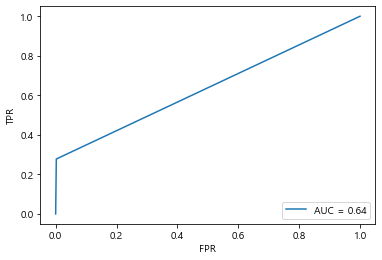

In [63]:
plt.plot(fpr, tpr, label = 'AUC = %0.2f'% roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [64]:
model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))
model_f1_score.append(f1_score(df_test_y, y_pred))

In [65]:
# GB
gb_model = GradientBoostingClassifier(min_samples_leaf = 30, min_samples_split = 50, max_depth = 3, random_state=1234,
                               learning_rate = 0.3, n_estimators =150)
gb_model.fit(df_train_x, df_train_y)

train_accuracy.append(gb_model.score(df_train_x, df_train_y))
test_accuracy.append(gb_model.score(df_test_x, df_test_y))

y_pred = gb_model.predict(df_test_x)
fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc= auc(fpr, tpr)

model_auc.append(roc_auc)

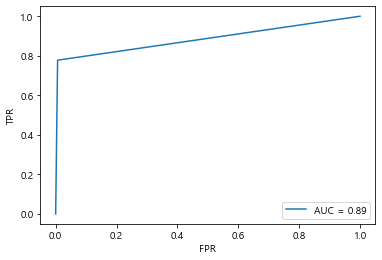

In [66]:
plt.plot(fpr, tpr, label = 'AUC = %0.2f'% roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [67]:
model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))
model_f1_score.append(f1_score(df_test_y, y_pred))

In [68]:
# SVC

svc_model =SVC(gamma = 1,C=10,  random_state=1234)
svc_model.fit(df_train_x, df_train_y)

train_accuracy.append(svc_model.score(df_scaled_train_x, df_train_y))
test_accuracy.append(svc_model.score(df_scaled_test_x, df_test_y))

y_pred = svc_model.predict(df_scaled_test_x)
fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc= auc(fpr, tpr)

model_auc.append(roc_auc)

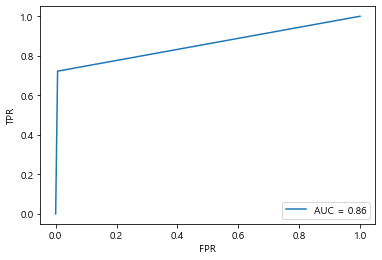

In [69]:
plt.plot(fpr, tpr, label = 'AUC = %0.2f'% roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [70]:
model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))
model_f1_score.append(f1_score(df_test_y, y_pred))

In [74]:
# ANN
nn_model = MLPClassifier(random_state = 1234, activation = 'relu', hidden_layer_sizes = (80, 80), solver = 'adam', batch_size = 20)
nn_model.fit(df_scaled_train_x, df_train_y)

train_accuracy.append(nn_model.score(df_scaled_train_x, df_train_y))
test_accuracy.append(nn_model.score(df_scaled_test_x, df_test_y))

y_pred = nn_model.predict(df_scaled_test_x)
fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc= auc(fpr, tpr)

model_auc.append(roc_auc)

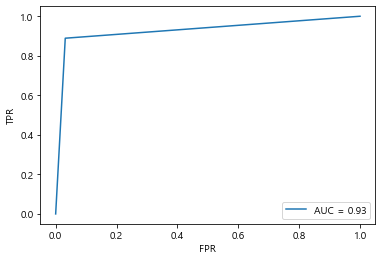

In [75]:
plt.plot(fpr, tpr, label = 'AUC = %0.2f'% roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [76]:
model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))
model_f1_score.append(f1_score(df_test_y, y_pred))

In [77]:
df_eval = pd.DataFrame(index = model)
df_eval['TrainAccuracy'] = train_accuracy
df_eval['TestAccuracy'] = test_accuracy
df_eval['AUC'] = model_auc
df_eval['Precision'] = model_precision
df_eval['Recall'] = model_recall
df_eval['F1Score'] = model_f1_score
df_eval.round(3)

,TrainAccuracy,TestAccuracy,AUC,Precision,Recall,F1Score
DT,0.946,0.947,0.638,0.909,0.278,0.426
GB,1.000,0.979,0.886,0.903,0.778,0.836
SVC,0.999,0.975,0.858,0.897,0.722,0.800
ANN,0.999,0.963,0.929,0.681,0.889,0.771


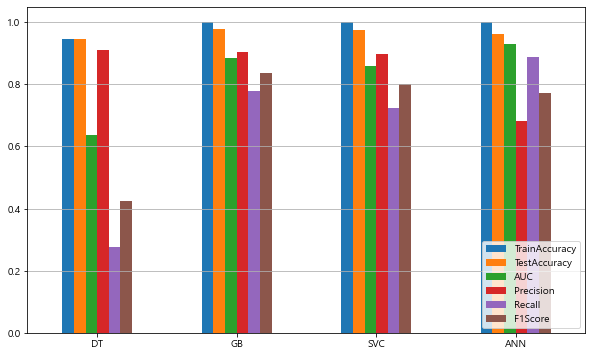

In [78]:
df_eval.plot.bar(rot=0, figsize=(10,6))
plt.legend(loc= 'lower right')
plt.grid(axis ='y')